<img src="https://raw.githubusercontent.com/Mauritas99/Proyect_images/refs/heads/main/Banners/ETL_EDA.jpg" width="100%">

><h2><em>Introducción</em><h2>

<h5 style="font-size:1.4rem;">Las enfermedades crónicas no transmisibles (ECNT) son la principal causa de <b>muerte y discapacidad</b> en el mundo. Cada año mueren 41 millones de personas, lo que equivale al 71% de las muertes que se producen en el mundo (Organización Panamericana de la Salud [OPS], 2023). Uno de los principales factores de riesgo (FR) de las ECNT es la <b>alimentación inadecuada</b>, junto con el  <b>consumo de tabaco</b>,  <b>el consumo nocivo de alcohol</b> y la  <b>inactividad física</b> (Ministerio de Salud y Desarrollo Social, 2019).</h5>
<h5 style="font-size:1.4rem;">La mayoría de las ECNT y sus FR se pueden prevenir y se producen a edades innecesariamente tempranas, en gran parte debido a un estilo de vida subóptimo, ligados con entornos alimentarios y construidos desfavorables, que favorecen el aumento de las enfermedades cardiovasculares, como las dietas  <b>ricas en calorías totales y grasas saturadas</b>, o la  <b>adquisición del hábito de fumar</b>, a lo que se suma ulteriormente la <b>reducción de la actividad física</b> y el aumento del estrés mental.</h5>
<h5 style="font-size:1.4rem;">El siguiente trabajo se desprende del documento "Modelado geoespacial del índice de salud cardiovascular ideal a partir de variables de sensado remoto" <b><a href="https://www.researchgate.net/publication/380599671_Modelado_geoespacial_del_indice_de_salud_cardiovascular_ideal_a_partir_de_variables_de_sensado_remoto?channel=doi&linkId=66453260bc86444c72e17fab&showFulltext=true">DOI:10.13140/RG.2.2.12089.79208</a></B>, empleando un dataset de pacientes asistentes al Hospital Nacional de Clínicas de Córdoba (HNC), para indagar en que medida determinadas variables socioeconómicas, geográficas y de estado nutricional se relacionan con el riesgo de padecer enfermedades cardiovasculares.</h5>

><h2><em>Extracción</em><h2>

<h4><em>1. Importar librerias</em></h4>
<hr>

In [2]:
%run ../functions/functions.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4><em>2. Cargar base de datos</em></h4>
<hr>

In [3]:
df = pd.read_excel("../1_data/base_pacientes_HNC.xlsx")

<h4><em>3. Inspeccionando el DataFrame</em></h4>
<hr>

In [4]:
nulos = df.isna().sum().sum()
duplicados = df.duplicated().sum()

print(f"Cantidad de datos del dataset: {df.size}")
print(f"El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.")
print(f"Cantidad de datos nulos: {nulos}")
print(f"Cantidad de datos duplicados: {duplicados}")

Cantidad de datos del dataset: 159272
El dataset contiene 344 filas y 463 columnas.
Cantidad de datos nulos: 18883
Cantidad de datos duplicados: 0


<h4><em>3.1 Inspeccionando valores nulos</em></h4>
<hr>

In [5]:
df.isna().sum().sort_values(ascending=False).head(15)

bIL-17 (pg    333
bIL-12 (pg    318
bIFN-A2 (p    317
bIL-33 (pg    310
bIFN-G (pg    303
bIL-23 (pg    303
bIL-6_pg/m    299
bIL-6_pg_1    297
bIL-1B (pg    297
bNº cigar     293
bTipo de T    291
bApo B_mg/    289
bIL-6 (pg/    283
bIL-10 (pg    280
bTNF (pg/m    264
dtype: int64

<h4><em>Resumen inspección del DataFrame</em></h4>

<li style="font-size:1.5rem; font-style:italic; list-style-type:square">El dataframe proporcionado corresponde a pacientes del HNC de la provincia de Córdoba donde se encontró:</li>
    <ul>
        <li style="font-size:1.3rem; margin-top:10px;">El Dataframe posee <b>344</b> filas y <b>463</b> columnas (una alta cardinalidad), con un total de <b>159272 </b> datos (floats y strings).
        </li>
        <li style="font-size:1.3rem; margin-top:10px;">El dataframe posee <b>18883</b> valores nulos (11.8 % del total de datos).</li>
        <li style="font-size:1.3rem; margin-top:10px;"> El dataframe no posee valores duplicados.</li>
        <li style="font-size:1.3rem; margin-top:10px;"> Como dato adicional, el dataset es el resultado de un merge entre dos dataset previos (explicando el prefijo "b" en algunas variables).</li>
    </ul>
<p style="font-size:1.5rem; font-style:italic; text-align:center; margin-top:2.5rem;">En base a la información presentada, y teniendo en cuenta las variables asociadas al riesgo cardiovascular, se decidió eliminar aquellas variables relacionadas con aspectos inmunológicos, cuantificación de determinados nutrientes fuera de interés y variables irrelevantes, para determinar el tamaño final de la base de datos.</p>

><h2><em>Transformación</em><h2>

<h4><em>1. Corregir columnas</em></h4>
<hr>

In [6]:
columnas_de_interes = ['SEXO','EDAD','Localidad','Ocupación', 'Grado de I', 'IMC_kg/m2',"bCod_TBQ (",'PAS_mmhg', 'PAD_mmhg','bSodio','COL_mg/dl',"GLUCEMIA_m","bBebida _1", "bVerdura y", "bPescado_1",'NDVI_mean','NDWI_mean','NDBI_mean',"Nivel de A"] # Columnas finales consideradas por el documento en cuestión

df_corregida = df[columnas_de_interes].copy()

columnas_renombradas = {
    'SEXO': 'Sexo',
    'EDAD': 'Edad',
    'Localidad': 'Localidad',
    'Ocupación': 'Ocupacion',
    'Grado de I': 'Grado de Inst.',
    'IMC_kg/m2': 'IMC_kg/m2',
    'PAS_mmhg': 'PAS_mmhg',
    'PAD_mmhg': 'PAD_mmhg',
    'COL_mg/dl': 'Col_mg/dl',
    "GLUCEMIA_m":"Glucemia_m",
    'NDVI_mean': 'NDVI_media',
    'NDWI_mean': 'NDWI_media',
    'NDBI_mean': 'NDBI_media',
    'bSodio': 'Sodio mg/d',
    "Nivel de A" : "AF_cod",
    "bCod_TBQ (" : "TBQ_cod",
    "bBebida _1" : "Bebidas_azucar ml/sem",
    "bVerdura y" : "Consumo_verduras",
    "bPescado_1" : "Consumo_pescado",
}

df_corregida.rename(columns=columnas_renombradas,inplace=True)

<h4><em>2. Corrección de valores nulos</em></h4>
<hr>

In [7]:
umbral = int(df_corregida.shape[1] * 0.7) # Umbral de minima cantidad de valores para permanecer en el dataset por fila.
print(f"Filas previo a aplicar el filtro: {df_corregida.shape[0]}")
df_corregida.dropna(thresh=umbral,inplace=True)
print(f"Filas despues de aplicar el filtro: {df_corregida.shape[0]}")

Filas previo a aplicar el filtro: 344
Filas despues de aplicar el filtro: 326


In [8]:
nulos_correg = df_corregida.isna().sum().sum()
print(f"Cantidad de datos nulos: {nulos_correg} ({100 - (nulos_correg * 100 / nulos):.1f} % menos que en el dataset original.)")

df_corregida.isna().sum().sort_values(ascending=False).head(15)

Cantidad de datos nulos: 837 (95.6 % menos que en el dataset original.)


NDBI_media               155
NDWI_media               155
NDVI_media               155
Grado de Inst.            81
Glucemia_m                73
Col_mg/dl                 71
Ocupacion                 51
Localidad                 45
PAS_mmhg                  10
PAD_mmhg                  10
Sodio mg/d                 6
Consumo_pescado            6
Bebidas_azucar ml/sem      6
TBQ_cod                    5
AF_cod                     4
dtype: int64

<h4><em>3. Imputar variables de interés</em></h4>
<hr>

  <ul>
        <li style="font-size:1.2rem; margin-top:10px;">Para aquellas variables de importancia, se determina la <b>naturaleza del dato</b> (en caso de ser numerica se reemplaza con <b>media / moda</b> , de ser cadena con <b>moda</b>).
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">La clasificación anterior se encuentra superditada a <b>interpretación del investigador</b> (ej. Algunas variables en cadena como "Dirección" no pueden ser completadas con moda, debido a la especificidad de la misma).</li>
    </ul>

In [9]:
col_ecolog = ["NDBI_media","NDWI_media","NDVI_media"] # Variables ecológicas.

var_num_correg = df_corregida.select_dtypes(include="number")
var_num_correg.drop(columns=col_ecolog,inplace=True) # Retiramos variables ecológicas.
var_num_correg.drop(columns="TBQ_cod",inplace=True) # Retiramos variable TBQ_Cod (aunque sea numérica, cada valor es una categoría).
var_num_correg_cols = var_num_correg.columns

var_cat_correg_cols = df_corregida.select_dtypes(exclude="number").columns
var_cat_correg_cols = var_cat_correg_cols.to_list()
var_cat_correg_cols.append("TBQ_cod") # Agregamos la variable numerica a imputar con moda.

for column in var_num_correg_cols:
    df_corregida[column] = df_corregida[column].fillna(df_corregida[column].mean())
    
for column in var_cat_correg_cols:
    df_corregida[column] = df_corregida[column].fillna(df_corregida[column].mode()[0])
    
# Controlamos cantidad de nulos post-transformación

nulos_def = df_corregida.isna().sum().sum()
print(f"Cantidad de datos nulos: {nulos_def} ({100 - (nulos_def * 100 / nulos):.1f} % menos que en el dataset original.)")

df_corregida.isna().sum().sort_values(ascending=False).head(5)

Cantidad de datos nulos: 465 (97.5 % menos que en el dataset original.)


NDBI_media    155
NDWI_media    155
NDVI_media    155
Sexo            0
Col_mg/dl       0
dtype: int64

<h4><em>4. Inputar variables ecológicas</em></h4>
<hr>

<p style="font-size:1.4rem;text-align:center;">Debido a la cantidad de valores nulos que poseen (y su importancia como variable dentro de la investigación), inputar con valores promedio podría <b>generar sesgos</b> y <b>disminuir la varianza</b>, por eso se decidió instanciar un modelo <b>Random Forest Regressor</b> para predecir los valores basandose en las variables con datos completos.</p>

In [10]:
from sklearn.ensemble import RandomForestRegressor

df_con_nulos = df_corregida[df_corregida["NDVI_media"].isna()]
df_sin_nulos = df_corregida.dropna(axis=0)

X_sin_na = df_sin_nulos.drop(columns=["NDVI_media","NDBI_media","NDWI_media"]).select_dtypes(exclude="object")
y_sin_na1 = df_sin_nulos["NDVI_media"]
y_sin_na2 = df_sin_nulos["NDBI_media"]
y_sin_na3 = df_sin_nulos["NDWI_media"]

X_con_na = df_con_nulos.drop(["NDVI_media","NDBI_media","NDWI_media"], axis=1).select_dtypes(exclude="object")

model_col_1 = RandomForestRegressor(n_estimators=100,random_state=42)
model_col_1.fit(X_sin_na,y_sin_na1)

model_col_2 = RandomForestRegressor(n_estimators=100,random_state=42)
model_col_2.fit(X_sin_na,y_sin_na2)

model_col_3 = RandomForestRegressor(n_estimators=100,random_state=42)
model_col_3.fit(X_sin_na,y_sin_na3)

predicciones1 = model_col_1.predict(X_con_na)
predicciones2 = model_col_2.predict(X_con_na)
predicciones3 = model_col_3.predict(X_con_na)

df_corregida.loc[df_corregida['NDVI_media'].isna(), 'NDVI_media'] = predicciones1
df_corregida.loc[df_corregida['NDBI_media'].isna(), 'NDBI_media'] = predicciones2
df_corregida.loc[df_corregida['NDWI_media'].isna(), 'NDWI_media'] = predicciones3

<h4><em>5. Categorizar variables</em></h4>
<hr>

<h4 style="font-size:1.7rem;"><em>5.1. Categorizar variables ecológicas</em></h4>
<hr width=80% style="position:relative; left:-10%;">

<h4 style="font-size: 1.5rem; font-weight: bold;">Puntos de corte:</h4>
    <table style="width: 100%; border-collapse: collapse; margin-top: 10px;text-align:center;">
        <tr style="background-color: #1F2739; font-weight: bold;">
            <th style="border: 1px solid #ccc; padding: 8px;">Índice</th>
            <th style="border: 1px solid #ccc; padding: 8px;">Rango</th>
            <th style="border: 1px solid #ccc; padding: 8px;">Descripción</th>
        </tr>
        <tr style="background-color: #1F2739;">
            <td rowspan="5" style="border: 1px solid #ccc; padding: 8px; text-align:center;">NDVI</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">&lt; 0,2</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">Suelo sin vegetación</td>
        </tr>
        <tr>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">0,2 a 0,4</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">Poca vegetación</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">0,4 a 0,6</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">Vegetación media</td>
        </tr>
        <tr>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">0,6 a 0,8</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">Vegetación densa</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">&gt; 0,8</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">Vegetación muy densa</td>
        </tr>
        <tr style="background-color: #1F2739;border-top:4px solid #ccc">
            <td rowspan="4" style="border: 1px solid #ccc; padding: 8px;text-align:center;">NDWI</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">0,2 a 1</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">Superficie con agua</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">0,0 a 0,2</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">Humedad</td>
        </tr>
        <tr>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">-0,3 a 0,0</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">Sequía moderada</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">-1 a -0,3</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">Sequía</td>
        </tr>
        <tr style="background-color: #1F2739;border-top:4px solid #ccc">
            <td rowspan="2" style="border: 1px solid #ccc; padding: 8px;text-align:center;">NDBI</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">&lt; 0</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color:#2C3446;">Cubierta vegetal</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">&gt; 0</td>
            <td style="border: 1px solid #ccc; padding: 8px;background-color: #323C50;">Cubierta edificada</td>
        </tr>
    </table>

In [11]:
df_corregida.loc[:,["NDVI_media","NDWI_media","NDBI_media"]]

df_corregida["NDVI_clasif"] = df_corregida["NDVI_media"].apply(clasificar_ndvi)
df_corregida["NDWI_clasif"] = df_corregida["NDWI_media"].apply(clasificar_ndwi)
df_corregida["NDBI_clasif"] = df_corregida["NDBI_media"].apply(clasificar_ndbi)

<h4 style="font-size:1.7rem;"><em>5.2. Categorizar Localidad</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [12]:
df_corregida["Localidad"] = df_corregida["Localidad"].apply(lambda x: "Córdoba" if x == "Córdoba" else "Interior")

<h4 style="font-size:1.7rem;"><em>5.3. Categorizar IMC</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [13]:
df_corregida["IMC_clasif"] = df_corregida["IMC_kg/m2"].apply(lambda x: 
    "Bajo peso" if x < 18.5 else
    "Normopeso" if 18.5 <= x < 25 else
    "Sobrepeso" if 25 <= x < 30 else
    "Obesidad"
)

<hr>
<h5 style="font-size:1.4rem;">Se busca determinar en que medida las diferentes variables recolectadas <b>(estado nutricional, socioeconómicas y ecológicas)</b> inciden en la aparición de enfermedades cardiovasculares en pacientes residentes en la provincia de Córdoba, que asisten al centro de cardiología del Hospital Nacional de Clínicas.</h5>
<h5 style="font-size:1.4rem;">Para ello, y para medir la incidencia futura de aparición de enfermedades cardiovasculares, se empleará el <b>Indice de Salud Cardiovascular Ideal (SCI)</b> y su monitoreo a través de métricas, creado por la American Heart Association (AHA) </h5>
<h5 style="font-size:1.4rem;">La AHA define la SCI como la presencia simultánea de cuatro comportamientos cardiovasculares favorables <b>(no fumar, IMC menor a 25 kg/m2, actividad física a un nivel objetivo y una dieta consistente con las recomendaciones de las guías actuales)</b> y tres factores de salud ideales <b>(colesterol total no tratado menor a 200 mg/dL, presión arterial no tratada menor a 120/80 mmHg y glucosa en ayunas no tratada menor a 100 mg/dL)</b> </h5>

<h4><em>6. Elaboración del SCI</em></h4>
<hr>

<h5 style="font-size:1.5rem">El índice SCI esta compuesto por:<h5>
 <table style="border-collapse: collapse; width: 100%; margin: 20px 0; font-size:1.3rem">
        <thead>
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: center;background-color:#1F2739;font-weight: bold;color:#F4EAE0;">Marcador</th>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: center;background-color:#1F2739;font-weight: bold;color:#F4EAE0;">Ideal</th>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: center;background-color:#1F2739;font-weight: bold;color:#F4EAE0;">Intermedio</th>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: center;background-color:#1F2739;font-weight: bold;color:#F4EAE0;">Pobre</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #323C50;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Tabaco</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Nunca o suspendido hace ≥ de 1 año</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Suspendido hace &lt; 1 año</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Fumador actual</td>
            </tr>
            <tr style="background-color: #2C3446;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Índice de masa corporal</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">&lt; 25 kg/m²</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">25 - 29.9 kg/m²</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">≥ 30 kg/m²</td>
            </tr>
            <tr style="background-color: #323C50;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Actividad Física</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">
                    ≥ 150 minutos/semana de intensidad moderada<br>
                    o ≥ 75 min/sem de intensidad rigurosa<br>
                    o ≥ 150 min/sem de combinación de intensidad moderada-rigurosa
                </td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">
                    1 - 149 min/sem de intensidad moderada<br>
                    o 1 - 74 min/sem de intensidad rigurosa<br>
                    o 1 - 149 min/sem de combinación de intensidad moderada-rigurosa
                </td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Ninguno o menos de los min/sem descritos previamente</td>
            </tr>
            <tr style="background-color: #2C3446;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Dieta*</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">4 componentes saludables</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">2 - 3 componentes saludables</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">0 - 1 componente saludable</td>
            </tr>
            <tr style="background-color: #323C50;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Presión Arterial</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">&lt;120/80 mmHg, sin tratamiento</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">120-139/80-89 mmHg o tratada hasta alcanzar objetivo</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">≥ 140/90 mmHg</td>
            </tr>
            <tr style="background-color: #2C3446;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Glucosa en ayunas</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">&lt; 100 mg/dL, sin tratamiento</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">100-125 mg/dL o tratada hasta alcanzar objetivo</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">≥126 mg/dL</td>
            </tr>
            <tr style="background-color: #323C50;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Colesterol Total</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">&lt; 200 mg/dL, sin tratamiento</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">200-239 mg/dL, con o sin tratamiento</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">≥ 240 mg/dL</td>
            </tr>
        </tbody>
    </table>
    <p style="font-size:1.2rem">* Entendiendo dieta saludable como aquella que contempla el consumo de los 4 componentes alimentarios definidos por la AHA:</p>
    <ul style="font-size:1.1rem">
        <li>400 g/día de frutas enteras y verduras de hojas verdes, naranjas, tomates y otras verduras, excluidas las de raíces y verduras con almidón;</li>
        <li>200 g por semana de pescado y marisco;</li>
        <li>menos de 1500 mg/día de sodio;</li>
        <li>menos de 1L por semana de gaseosas, jugos y aguas saborizadas con azúcar.</li>
    </ul>

<h4><em>6.1. Clasificación de la variable "Tabaco"</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [14]:
df_corregida["TBQ_SCI"] = df_corregida["TBQ_cod"].apply(lambda x: "Ideal" if x == 0 else "Intermedio" if x == 1.0 else "Pobre")

<h4><em>6.2. Clasificación de la variable "IMC"</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [15]:
df_corregida["IMC_SCI"] = df_corregida["IMC_kg/m2"].apply(lambda x: "Ideal" if x < 25 else "Intermedio" if (x < 29.9 and x > 25) else "Pobre")

<h4><em>6.3. Clasificación de la variable "Actividad Fisica"</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [16]:
df_corregida["AF_SCI"] = df_corregida["AF_cod"].apply(lambda x: "Ideal" if x == "Alto" else "Intermedio" if x == "Moderado" else "Pobre")

<h4><em>6.4. Clasificación de la variable "Presion Arterial"</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [17]:
df_corregida["PA_SCI"] = df_corregida.apply(lambda row: clasificar_presion(row['PAS_mmhg'], row['PAD_mmhg']),
    axis=1)

<h4><em>6.5. Clasificación de la variable "Glucosa en ayunas"</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [18]:
df_corregida["Glucemia_SCI"] = df_corregida["Glucemia_m"].apply(lambda x: "Ideal" if x < 100 else "Intermedio" if (x >= 100 and x <= 125) else "Pobre")

<h4><em>6.6. Clasificación de la variable "Colesterol"</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [19]:
df_corregida["Colesterol_SCI"] = df_corregida["Col_mg/dl"].apply(lambda x: "Ideal" if x < 200 else "Intermedio" if (x >= 200 and x <= 239) else "Pobre")

<h4><em>6.7. Clasificación de la variable "Dieta"</em></h4>
<hr width=80% style="position:relative; left:-10%;">

In [20]:
#Se compone se la presencia o ausencia de 4 componentes dietarios (consumo de beb.azuc., pescado, sodio y frut. y ver.), los cuales dan el puntaje final a la métrica "Dieta" (cada componente dietario aporta 1 punto).

df_corregida["Con_verd_Cod"] = df_corregida["Consumo_verduras"].apply(lambda x: 1 if x >= 400 else 0)
df_corregida["Con_pesc_Cod"] = df_corregida["Consumo_pescado"].apply(lambda x: 1 if x >= 200 else 0)
df_corregida["Con_sodio_Cod"] = df_corregida["Sodio mg/d"].apply(lambda x: 1 if x < 1500 else 0)
df_corregida["Con_beb_Cod"] = df_corregida["Bebidas_azucar ml/sem"].apply(lambda x: 1 if x < 1000 else 0)

df_corregida["Con_Score"] = df_corregida["Con_verd_Cod"] + df_corregida["Con_pesc_Cod"] + df_corregida["Con_sodio_Cod"] + df_corregida["Con_beb_Cod"]

df_corregida["Dieta_SCI"] = df_corregida["Con_Score"].apply(lambda x: "Ideal" if x == 4 else "Intermedio" if (x == 2 or x == 3) else "Pobre")

<h4><em>6.8. Elaboracion del índice SCI</em></h4>
<hr width=80% style="position:relative; left:-10%;">

 <table style="border-collapse: collapse; width: 100%; margin: 20px 0; font-size:1.3rem">
        <thead>
            <tr>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: center;background-color:#1F2739;font-weight: bold;color:#F4EAE0;">Clasificación</th>
                <th style="border: 1px solid #ddd; padding: 8px; text-align: center;background-color:#1F2739;font-weight: bold;color:#F4EAE0;">Condiciones</th>
            </tr>
        </thead>
        <tbody>
            <tr style="background-color: #323C50;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Ideal</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Puntaje ideal en las <b>siete</b> métricas de salud.</td>
            </tr>
            <tr style="background-color: #2C3446;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Intermedio</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Dentro de las siete métricas de salud, presencia de al menos un valor intermedio, pero <b>ninguno pobre.</b></td>
            </tr>
            <tr style="background-color: #323C50;">
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">Pobre</td>
                <td style="border: 1px solid #ddd; padding: 8px; text-align: center;">
                    Dentro de las siete métricas de salud, presencia de <b>al menos un</b> valor pobre.
                </td>
            </tr>
        </tbody>
    </table>

In [21]:
col_sci = ["IMC_SCI","PA_SCI","Glucemia_SCI","Colesterol_SCI","Dieta_SCI","AF_SCI","TBQ_SCI"]

# Contamos la cantidad de métricas con sus diferentes valores (ideal,intermedio y pobre).

df_corregida["SCI_count_ideal"] = df_corregida[col_sci].apply(lambda row: (row == 'Ideal').sum(), axis=1)
df_corregida["SCI_count_intermedio"] = df_corregida[col_sci].apply(lambda row: (row == 'Intermedio').sum(), axis=1)
df_corregida["SCI_count_pobre"] = df_corregida[col_sci].apply(lambda row: (row == 'Pobre').sum(), axis=1)

# Clasificar SCI de cada paciente segun sus métricas.

df_corregida["SCI_Final"] = df_corregida.apply(lambda row: clasificar_sci(row["SCI_count_ideal"],row["SCI_count_intermedio"],row["SCI_count_pobre"]),axis=1)

<h4><em>7. Retirar variables generadas innecesarias.</em></h4>
<hr>

In [22]:
col_inn = ['Con_verd_Cod', 'Con_pesc_Cod', 'Con_sodio_Cod', 'Con_beb_Cod','Con_Score','SCI_count_ideal', 'SCI_count_intermedio','SCI_count_pobre','TBQ_SCI', 'IMC_SCI', 'AF_SCI', 'PA_SCI', 'Glucemia_SCI','Colesterol_SCI', 'Dieta_SCI',"NDVI_media","NDWI_media","NDBI_media"]

df_corregida.drop(columns=col_inn,inplace=True)

<h4><em>Resumen transformación del DataFrame</em></h4>
 <ul>
        <li style="font-size:1.2rem; margin-top:10px;">Se <b>definieron</b> y <b>corrigieron</b> los nombres de las columnas de interés.
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">Se corrigió aquellos valores nulos en las columnas de interés.</li>
        <li style="font-size:1.2rem; margin-top:10px;"> Se diseñó la columna <b>SCI</b> como <b>variable objetivo</b>,derivada de las métricas calculadas.</li>
        <li style="font-size:1.2rem; margin-top:10px;"> Finalmente, el dataset corregido posee <b>312</b> filas y <b>30</b> columnas, con un total de <b>10296</b> datos.</li>
    </ul>

><h2><em>Visualización de datos</em><h2>

<h4><em>1. Visualización de outliers</em></h4>
<hr>

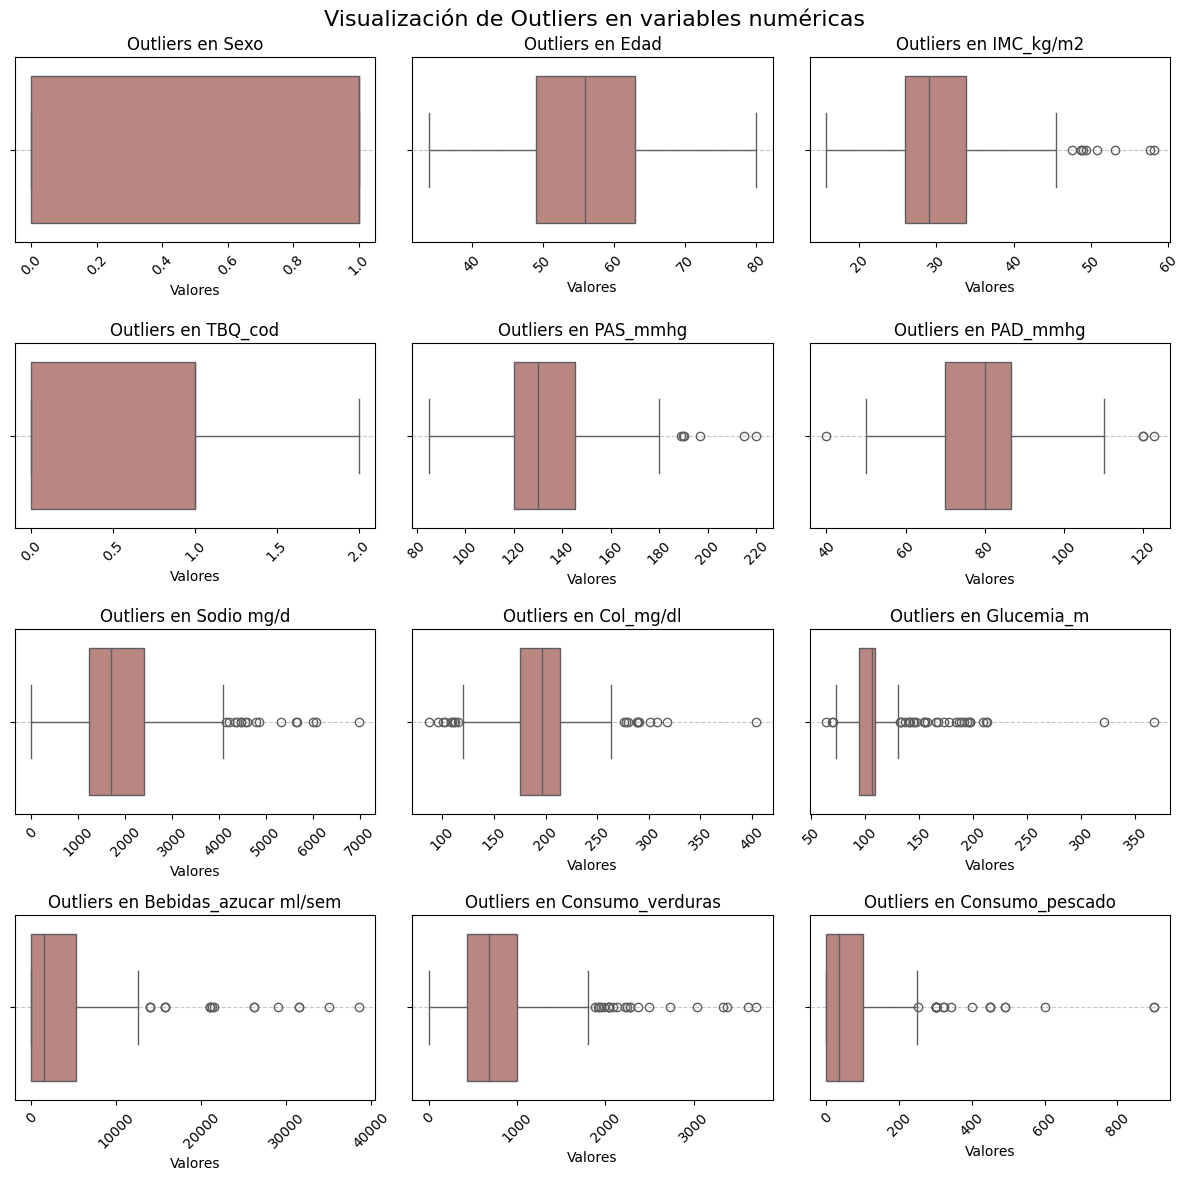

In [32]:
var_num = df_corregida.select_dtypes(include="number")

num_col = len(var_num.columns)
cols = 3 
rows = (num_col // cols) + (num_col % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows))
axes = axes.flatten()

for i, column in enumerate(var_num.columns):
    sns.boxplot(
        x=var_num[column],
        ax=axes[i],
        color="xkcd:brownish pink" 
    )
    axes[i].set_title(f"Outliers en {column}", fontsize=12) 
    axes[i].grid(axis='y', linestyle='--', alpha=0.7) 
    axes[i].set_xlabel("Valores", fontsize=10)  
    axes[i].tick_params(axis='x', rotation=45) 


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) 

# Título global y ajustes finales
fig.suptitle("Visualización de Outliers en variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

<h4><em>2. Visualización de frecuencias (variables categóricas)</em></h4>
<hr>

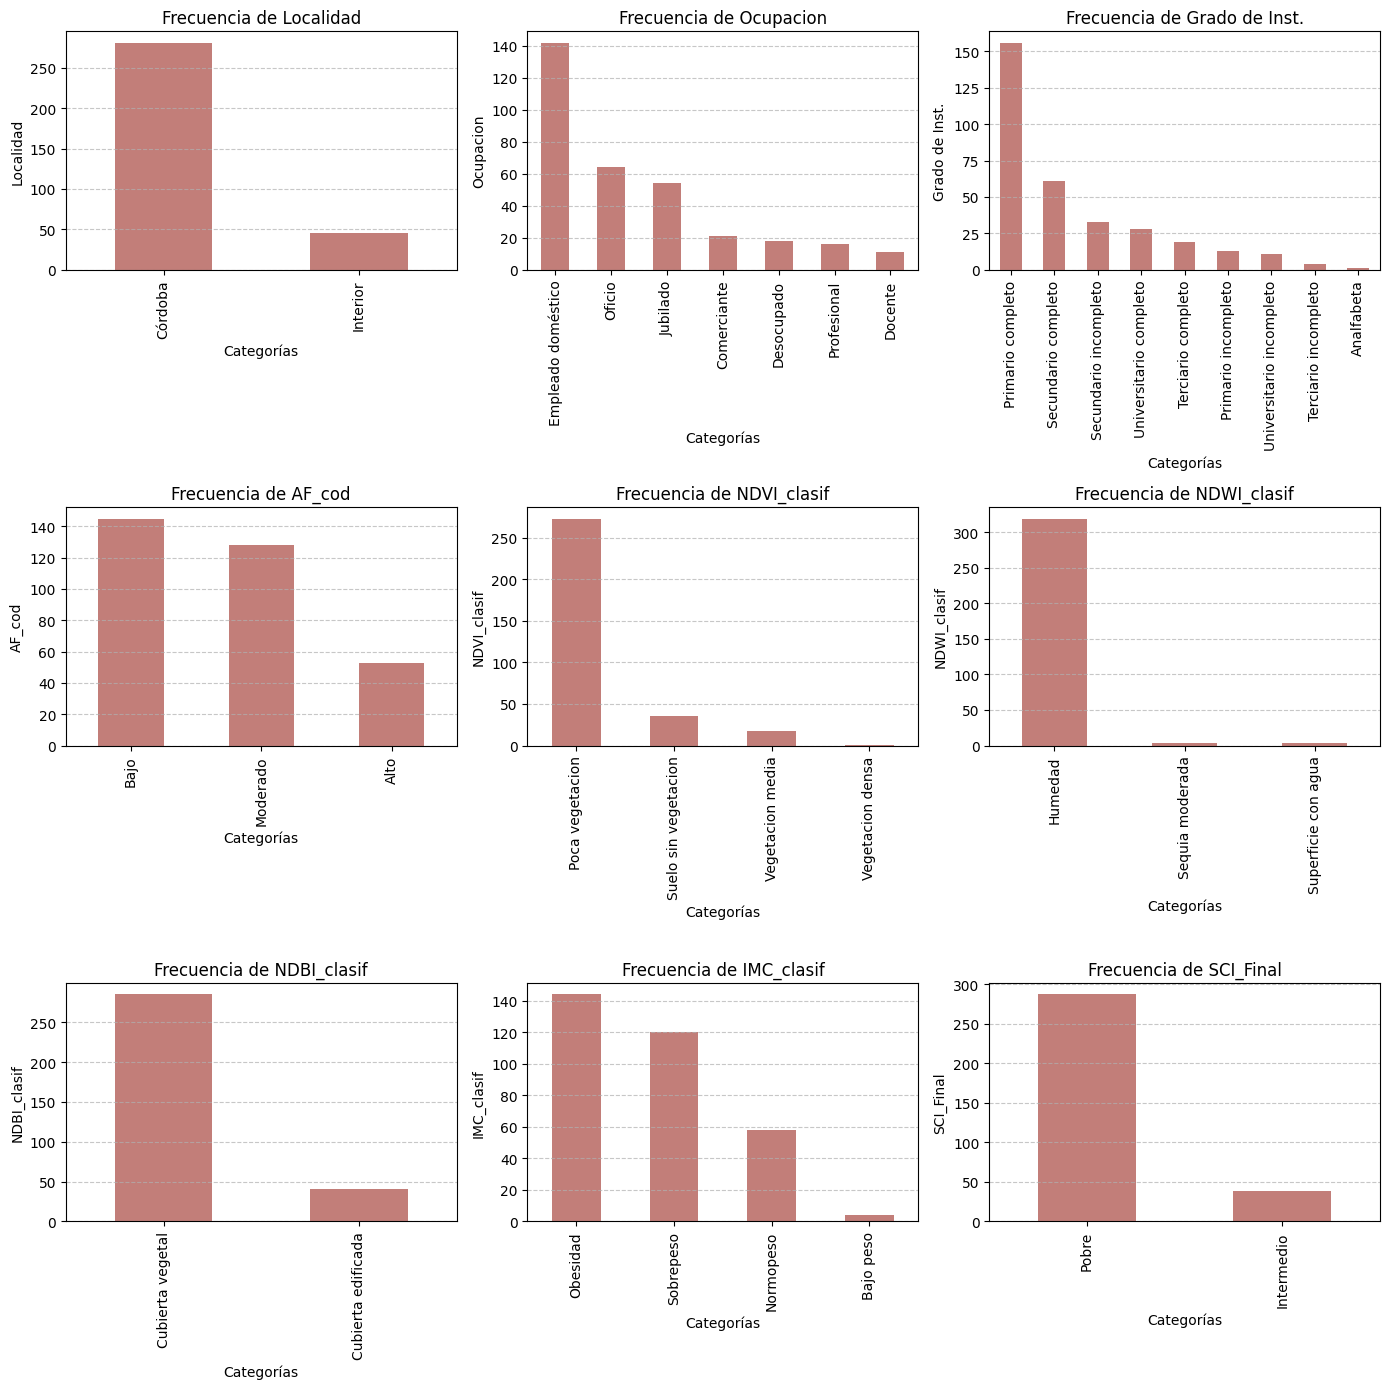

In [29]:
df_str = df_corregida.select_dtypes(include=object) # Seleccionamos variables categóricas

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 14))
axes = axes.flatten()

for ax, col in zip(axes, df_str.columns):
    df_str[col].value_counts().plot(
        kind="bar",
        ax=ax,
        color="xkcd:brownish pink", 
        title=f"Frecuencia de {col}"
    )
    ax.set_ylabel(col) 
    ax.set_xlabel("Categorías")
    ax.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout()
plt.show()

<h4 style="font-weight: bold;"><em>Resumen visualizaciones del DataFrame</em></h4>
 <ul>
        <li style="font-size:1.2rem; margin-top:10px;">Las variables numericas del dataset poseen una <b>cantidad considerable de outliers</b>.
        </li>
        <li style="font-size:1.2rem; margin-top:10px;">Existen tendencias <b>muy marcadas</b> en la mayoria de variables categóricas.</b></li>
    </ul>

><h2><em>Carga de datos</em><h2>

<h4><em>1. Exportar csv</em></h4>
<hr>

In [24]:
df_corregida.to_csv("../1.1_data_limpia/base_pacientes_corregida.csv",index=False)